In [1]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
%matplotlib inline

# 1

In [2]:
def gray2ycrcb(image):
    img1 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
    return img2

In [3]:
def ycrcb2gray(image):
    img1 = cv2.cvtColor(image, cv2.COLOR_YCR_CB2BGR)
    img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    return img2

In [4]:
def print_img(image):
    print(image.shape)
    plt.figure(figsize=(6, 6))
    io.imshow(image)
    plt.show()

In [5]:
def linear_transform(image):
    minv = image[0][0]
    maxv = image[0][0]
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            minv = min(minv, image[i][j])
            maxv = max(maxv, image[i][j])
    zero_image =  image - minv
    maxv -= minv
    zero_image = (255.0 / maxv) * zero_image
    return (zero_image).astype('uint8')

In [ ]:
image = io.imread('sonet.jpg') #.astype('float64')/256.0
print (list(image))
print_img(image)
image = gray2ycrcb(image)
print_img(image)

[array([136, 137, 138, 139, 140, 141, 141, 141, 142, 143, 143, 142, 144,
       146, 146, 146, 148, 149, 149, 150, 150, 151, 153, 154, 156, 156,
       156, 156, 156, 157, 157, 157, 158, 160, 162, 162, 161, 162, 163,
       164, 165, 166, 167, 166, 167, 170, 171, 171, 170, 171, 173, 174,
       175, 176, 177, 179, 179, 179, 179, 181, 181, 180, 181, 183, 184,
       185, 186, 186, 185, 185, 185, 185, 186, 187, 188, 189, 190, 190,
       190, 190, 191, 192, 193, 195, 196, 197, 197, 197, 197, 198, 199,
       199, 199, 198, 198, 198, 203, 201, 204, 205, 204, 205, 206, 204,
       205, 207, 208, 209, 208, 207, 206, 206, 206, 208, 210, 209, 210,
       212, 213, 213, 218, 218, 217, 217, 217, 218, 219, 219, 219, 219,
       220, 220, 221, 222, 222, 223, 222, 224, 224, 223, 223, 224, 225,
       224, 224, 225, 225, 224, 223, 224, 227, 229, 229, 230, 232, 233,
       233, 233, 233, 234, 234, 233, 234, 236, 237, 236, 235, 237, 236,
       237, 238, 239, 239, 240, 241, 241, 240, 240, 239, 239, 2

# 2

In [12]:
def simple_delight(image, radii=50):
    img_copy = image.copy()
    bright_img = img_copy[:,:,0]
    ysh = cv2.GaussianBlur(bright_img, (2*radii+1, 2*radii+1), 0)
    div = np.log(bright_img.astype('float64') / ysh.astype('float64'))
    div = linear_transform(div)
    img_copy[:,:,0] = div
    print_img(ycrcb2gray(img_copy))

# 3, 4 

(510, 384)


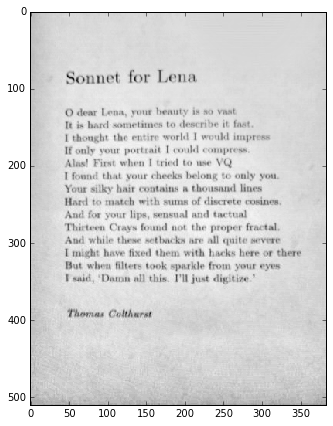

In [14]:
simple_delight(image,radii=90)

In [9]:
def hard_delight(image, radii=50):
    img_copy = image.copy()
    bright_img = img_copy[:,:,0]
    ysh = cv2.GaussianBlur(bright_img, (2*radii+1, 2*radii+1), 0)
    div = bright_img.astype('float64') / ysh.astype('float64')
    div = linear_transform(div)
    img_copy[:,:,0] =  div
    print_img(ycrcb2gray(img_copy))

# 5, 6

(510, 384)


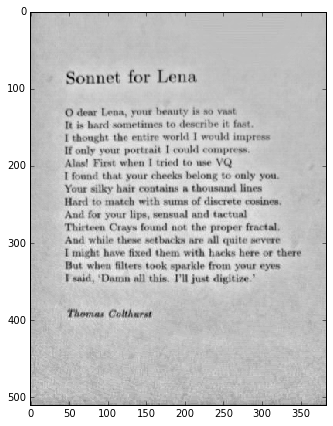

In [15]:
hard_delight(image, radii=40)

 $\log{Y/Y'}$ выглядит лучше, чем $Y/Y'$. Логарифм сильно "сглаживает" числа, которые лежат около $1$, т.е. монотонный фон изображения таковым и останется, а вот буквы будут выделены ярко, т.к. около $0$ числа не сглаживаются, а наоборот, раскидываются на большое расстояние.